In [14]:
from statsmodels.iolib.summary2 import summary_col
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
url = 'https://github.com/SofiyaLyn/Thesis/raw/main/almostcleaned_data.csv'
cleaned_data = pd.read_csv(url)
cleaned_data.head()

,Year,Country,"Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)",IPO_market_share,New_Business,IPOs_Number_of_Issues,P/E_Ratio,E/P_ratio,Stock_Market_Index,Interest_rate_up_to_1_mln,...,Aver_interest_rate_to_nonfinance,Real_GDP_Growth_(%),Nominal_GDP_($B),Population_(M),Population_Growth_(%),GDP_Per_Capita_($),Real_Private_Consumption_Growth_(%),Real_Government_Consumption_Growth_(%),Real_Gross_Fixed_Investment_Growth_(%),Industrial_Production_Growth_(%)
0,2009,Hungary,0.00,0.00,42046,1,15.2913,0.07,"21,227.01",NaN,...,#DIV/0!,-3.49,52.02,7.47,(0.67),"6,961.09",-4.69,0.00,-15.95,-20.18
1,2010,Hungary,179.37,64.03,"44,269.00",4,12.1724,0.08,"21,327.07",9.40,...,8.61,1.39,50.68,7.43,(0.65),"6,825.90",1.54,6.13,-19.09,14.13
2,2011,Hungary,0.00,0.00,"52,217.00",1,10.8504,0.09,"16,974.24",9.30,...,8.495,2.36,57.68,7.38,(0.62),"7,817.14",2.14,0.66,-3.66,17.22
3,2012,Hungary,2.93,1.05,"32,311.00",1,12.6385,0.08,"18,173.20",10.46,...,9.65,0.49,54.30,7.33,(0.61),"7,403.74",2.92,-0.27,2.00,2.32
4,2013,Hungary,1.97,0.70,"28,207.00",1,10.6615,0.09,"18,564.08",8.79,...,8.09,-0.59,55.81,7.29,(0.60),"7,655.79",-3.24,2.76,-0.42,-0.98


In [16]:
cleaned_data['treated'] = cleaned_data['Country'].isin(["Hungary", "Poland", "Slovakia", "Czech Republic", "Slovenia", "Bulgaria", "Romania", "Estonia", "Latvia", "Lithuania"])
cleaned_data['treated'] = cleaned_data['treated'].astype(int)

cleaned_data['post_intervention'] = (cleaned_data['Year'] >= 2018).astype(int)
cleaned_data['treated_intervention'] = cleaned_data['treated'] * cleaned_data['post_intervention']

print(cleaned_data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)',
       'IPO_market_share', 'New_Business', 'IPOs_Number_of_Issues',
       'P/E_Ratio', 'E/P_ratio', 'Stock_Market_Index',
       'Interest_rate_up_to_1_mln', 'Interest_rate_over_€1M',
       'Aver_interest_rate_to_nonfinance', 'Real_GDP_Growth_(%)',
       'Nominal_GDP_($B)', 'Population_(M)', 'Population_Growth_(%)',
       'GDP_Per_Capita_($)', 'Real_Private_Consumption_Growth_(%)',
       'Real_Government_Consumption_Growth_(%)',
       'Real_Gross_Fixed_Investment_Growth_(%)',
       'Industrial_Production_Growth_(%)', 'treated', 'post_intervention',
       'treated_intervention'],
      dtype='object')


In [25]:
cleaned_data.columns = cleaned_data.columns.str.replace('(', '_').str.replace(')', '').str.replace('%', 'Percent').str.replace('$', 'Dollar').str.replace('€', 'Euro')

In [32]:
print(cleaned_data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market__USD,_mln',
       'IPO_market_share', 'New_Business', 'IPOs_Number_of_Issues',
       'P/E_Ratio', 'E/P_ratio', 'Stock_Market_Index',
       'Interest_rate_up_to_1_mln', 'Interest_rate_over_Euro1M',
       'Aver_interest_rate_to_nonfinance', 'Real_GDP_Growth__Percent',
       'Nominal_GDP__DollarB', 'Population__M', 'Population_Growth__Percent',
       'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent',
       'Real_Government_Consumption_Growth__Percent',
       'Real_Gross_Fixed_Investment_Growth__Percent',
       'Industrial_Production_Growth__Percent', 'treated', 'post_intervention',
       'treated_intervention'],
      dtype='object')


In [18]:
formula = 'Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention'
model = smf.ols(formula, data=cleaned_data).fit()
summary_table = summary_col([model], stars=True)
print(summary_table)


                     Interest_rate_over_Euro1M
----------------------------------------------
Intercept            6.3254***                
                     (0.6713)                 
treated              -1.2810*                 
                     (0.7574)                 
post_intervention    -1.6463*                 
                     (0.9741)                 
treated_intervention -0.6245                  
                     (1.1553)                 
R-squared            0.1229                   
R-squared Adj.       0.1053                   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [19]:

with open('/Users/sonetalyn/Desktop/Thesis/Interest Rate on Business Loans over EUR 1 mln.html', 'w') as f:
    f.write(summary_table.as_html())

In [20]:
grouped_data = cleaned_data.groupby(['Year', 'treated']).agg({'Interest_rate_over_Euro1M': 'mean'}).reset_index()
sns.set(style="whitegrid")

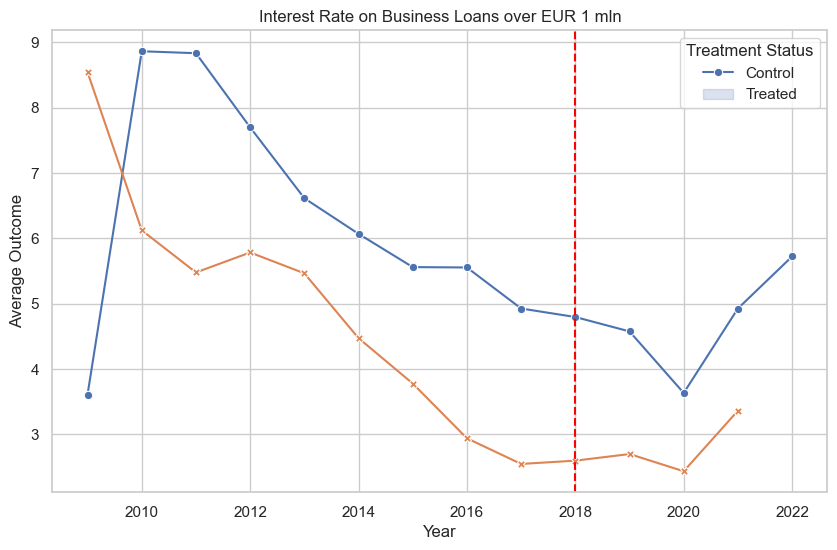

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='Interest_rate_over_Euro1M', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Interest Rate on Business Loans over EUR 1 mln')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])
plt.axvline(x=2018, color='red', linestyle='--')
plt.savefig('/Users/sonetalyn/Desktop/Thesis/Interest_Rate_Over_plot.png')
plt.show()

In [24]:
cleaned_data['intercept'] = 1
formula = """ Interest_rate_over_Euro1M ~ treated + post_intervention + treated_intervention + GDP_Per_Capita__Dollar + Real_Private_Consumption_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent + intercept"""
cleaned_data['Population_Growth__Percent'] = pd.to_numeric(cleaned_data['Population_Growth__Percent'], errors='coerce')
cleaned_data['GDP_Per_Capita__Dollar'] = cleaned_data['GDP_Per_Capita__Dollar'].astype(str).str.replace(',', '').astype(float)
model = smf.ols(formula, data=cleaned_data).fit()

# Create a summary table of the results from the model
summary_table = summary_col([model], stars=True)

# Print the summary table
print(summary_table)

# Save the summary table to an HTML file
with open('/Users/sonetalyn/Desktop/Thesis/Controlled Interest Rate Over 1 mln EUR.html', 'w') as f:
    f.write(summary_table.as_html())


                                            Interest_rate_over_Euro1M
---------------------------------------------------------------------
Intercept                                   4.5646***                
                                            (0.3644)                 
treated                                     -0.6642                  
                                            (0.6554)                 
post_intervention                           -1.3613*                 
                                            (0.8198)                 
treated_intervention                        0.6445                   
                                            (0.9885)                 
GDP_Per_Capita__Dollar                      -0.0003***               
                                            (0.0000)                 
Real_Private_Consumption_Growth__Percent    -0.0662                  
                                            (0.0630)                 
Real_Government_Con

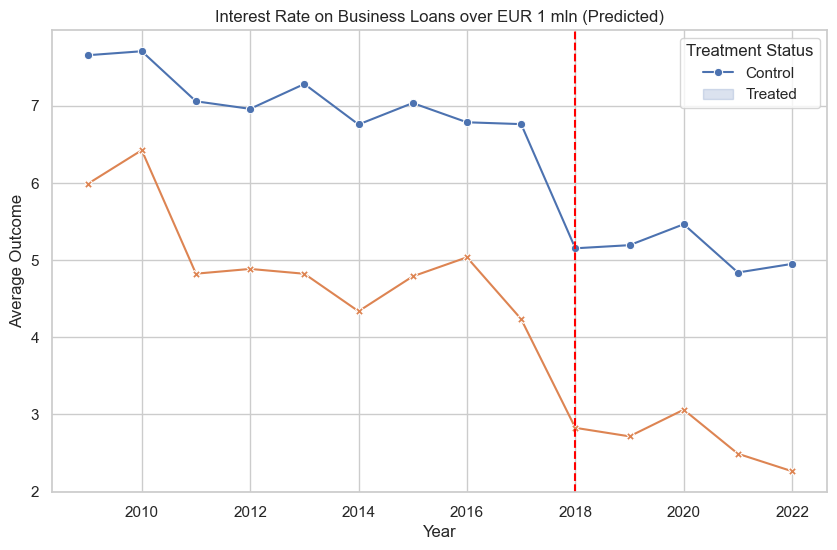

In [23]:
# Fit the model
model = smf.ols(formula, data=cleaned_data).fit()

# Generate predicted values
cleaned_data['predicted'] = model.predict(cleaned_data)

# Group the data by 'Year' and 'treated', and calculate the mean of 'predicted'
grouped_data = cleaned_data.groupby(['Year', 'treated'])['predicted'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='predicted', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Interest Rate on Business Loans over EUR 1 mln (Predicted)')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])
plt.axvline(x=2018, color='red', linestyle='--')

# Save the plot
plt.savefig('/Users/sonetalyn/Desktop/Thesis/Interest_Rate_Over_predicted_plot.png')

# Show the plot
plt.show()